Скачиваем **pandas**

In [1]:
!pip install pandas

Устанавливаем **plotly** для графиков

In [2]:
!pip install plotly

Импортируем модуль **pandas**

In [3]:
import pandas as pd

Импортируем модуль **plotly**

In [4]:
import plotly.express as px

Создаём dataframe из файла *steam_games*

In [5]:
df_steam_games = pd.read_csv("steam_games.csv")
print(df_steam_games)

       steam_appid                  name               developers  \
0          2719580              勇者の伝説の勇者                 ['ぽけそう']   
1          2719590         Light No Fire          ['Hello Games']   
2          2719600  Lorhaven: Cursed War      ['GoldenGod Games']   
3          2719610          PUIQ: Demons              ['Giammnn']   
4          2719650        Project XSTING          ['Saucy Melon']   
...            ...                   ...                      ...   
71424      2294300     Touchdown Pinball  ['Super PowerUp Games']   
71425      2294250     Speed Golf Royale      ['Mainframe Games']   
71426      2294160         Isle of Swaps           ['Fuzz Force']   
71427      2294130               Goobies               ['Knifes']   
71428      2294630       WindowBlinds 11             ['Stardock']   

                    publishers  \
0                     ['ぽけそう']   
1              ['Hello Games']   
2          ['GoldenGod Games']   
3                  ['Giammnn']   
4

Создаём dataframe из файла *Valve_Player_Data*

In [6]:
df_valve_player_data = pd.read_csv("Valve_Player_Data.csv")
print(df_valve_player_data)

          Month_Year  Avg_players       Gain Percent_Gain  Peak_Players  \
0     September 2021    512350.92     268.96       +0.05%        942519   
1        August 2021    512081.96    6014.60       +1.19%        802544   
2          July 2021    506067.36  -43279.72       -7.88%        763523   
3          June 2021    549347.08 -110541.81      -16.75%        929940   
4           May 2021    659888.89  -63457.63       -8.77%       1087197   
...              ...          ...        ...          ...           ...   
5266   December 2016       192.03     -21.90      -10.24%           405   
5267   November 2016       213.92    -134.68      -38.63%           537   
5268    October 2016       348.60    -201.75      -36.66%          1031   
5269  September 2016       550.36     543.26    +7654.89%          2836   
5270     August 2016         7.10        NaN          NaN            18   

                                     URL        Date  \
0        https://steamcharts.com/app/730  2

Преобразовываем название игры

In [7]:
df_valve_player_data['Game_Name'] = (
    df_valve_player_data['Game_Name']
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
)

df_steam_games['name'] = (
    df_steam_games['name']
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
)

merged_df = pd.merge(
    df_valve_player_data, df_steam_games, 
    left_on='Game_Name', right_on='name', 
    how='inner')

print(f"Успешно объединено {len(merged_df)} записей из {len(df_valve_player_data)}")

Успешно объединено 2939 записей из 5271


Как мы видем примерно половины строк мы откинули, но нам надо больше строк. 
Для этого нам надо будет про анализировать данные и по нима понять какие имеют больше ценность. А пока оставим это так

In [8]:
merged_df.head()

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name,steam_appid,name,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,September 2021,167102.12,-17726.28,-9.59%,400709,https://steamcharts.com/app/578080,2021-09-01,pubg battlegrounds,578080,pubg battlegrounds,...,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0
1,August 2021,184828.40,-1421.57,-0.76%,444355,https://steamcharts.com/app/578080,2021-08-01,pubg battlegrounds,578080,pubg battlegrounds,...,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0
2,July 2021,186249.97,6911.70,+3.85%,413274,https://steamcharts.com/app/578080,2021-07-01,pubg battlegrounds,578080,pubg battlegrounds,...,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0
3,June 2021,179338.27,-5362.95,-2.90%,427913,https://steamcharts.com/app/578080,2021-06-01,pubg battlegrounds,578080,pubg battlegrounds,...,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0
4,May 2021,184701.21,-1409.44,-0.76%,419509,https://steamcharts.com/app/578080,2021-05-01,pubg battlegrounds,578080,pubg battlegrounds,...,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0


Длеам так, что бы всегда показывали всё полностью.

In [9]:
pd.set_option('display.max_columns', None)  
print(merged_df) 

          Month_Year  Avg_players      Gain Percent_Gain  Peak_Players  \
0     September 2021    167102.12 -17726.28       -9.59%        400709   
1        August 2021    184828.40  -1421.57       -0.76%        444355   
2          July 2021    186249.97   6911.70       +3.85%        413274   
3          June 2021    179338.27  -5362.95       -2.90%        427913   
4           May 2021    184701.21  -1409.44       -0.76%        419509   
...              ...          ...       ...          ...           ...   
2934    October 2020      2613.04  -1568.89      -37.52%         11250   
2935  September 2020      4181.93   2536.83     +154.21%         10614   
2936     August 2020      1645.10   -799.70      -32.71%          2291   
2937       July 2020      2444.79   -140.84       -5.45%          4279   
2938       June 2020      2585.63       NaN          NaN          3793   

                                      URL        Date           Game_Name  \
0      https://steamcharts.com/app

Проверям на пропущенные значения.

*5*
# hihi
- jkjk
- uyuiyiuu

In [10]:
merged_df.isnull().sum()

Month_Year              0
Avg_players             0
Gain                   55
Percent_Gain           55
Peak_Players            0
URL                     0
Date                    0
Game_Name               0
steam_appid             0
name                    0
developers              0
publishers              0
categories              0
genres                  0
required_age            0
n_achievements          0
platforms               0
is_released             0
release_date            0
additional_content      0
total_reviews           0
total_positive          0
total_negative          0
review_score            0
review_score_desc       0
positive_percentual     0
metacritic              0
is_free                 0
price_initial (USD)     0
dtype: int64

Мы видем что Percent_Gain и в Gain есть пропущенные значение. Для начало нам надо понять являеться ли это проблемой.  

Моё предположения это не проблема скорее всго у все игр отсутсвие первый день и там написан nan.
Для проверки это мы сравним колличество игр с колличество пропущенных и если они одинаковы поменям все nan на ноль

In [11]:
count_game = len(merged_df['Game_Name'].unique())
print(f"Всего игр: {count_game}")

miss_data = merged_df.isnull().sum()

if count_game == miss_data['Gain']:
    if count_game == miss_data['Percent_Gain']:
        print("Прорущенных данных нет в Gain и Percent_Gain")
        merged_df.fillna(0, inplace=True)
    else:
        raise "В Percent_Gain не хватает данных"
else:
    raise "В Gain не хватает данных"

Всего игр: 55
Прорущенных данных нет в Gain и Percent_Gain


Создаём копию DataFrame для следующего анализа.

In [12]:
df_copy = merged_df.copy(deep=True)

Меняем столбец даты

In [13]:
df_copy['Month_Year'] = pd.to_datetime(df_copy['Month_Year'], format='%B %Y').dt.to_period('M')

In [14]:
df_copy.dtypes

Month_Year             period[M]
Avg_players              float64
Gain                     float64
Percent_Gain              object
Peak_Players               int64
URL                       object
Date                      object
Game_Name                 object
steam_appid                int64
name                      object
developers                object
publishers                object
categories                object
genres                    object
required_age               int64
n_achievements             int64
platforms                 object
is_released                 bool
release_date              object
additional_content        object
total_reviews              int64
total_positive             int64
total_negative             int64
review_score             float64
review_score_desc         object
positive_percentual      float64
metacritic                 int64
is_free                     bool
price_initial (USD)      float64
dtype: object

Создаем столбцы для выявления законмерностей.

In [15]:
df_copy['platforms_n'] = df_copy['platforms'].apply(len)

# Количество разработчиков
df_copy['n_developers'] = df_copy['developers'].apply(len)

# Количество издателей
df_copy['n_publishers'] = df_copy['publishers'].apply(len)

# Количество жанров
df_copy['n_genres'] = df_copy['genres'].apply(len)

# Количество категорий
df_copy['n_categories'] = df_copy['categories'].apply(len)

# Дополнительные контент
df_copy['n_additional_content'] = df_copy['additional_content'].apply(len)

# Платная игра или нет в формате int
df_copy['int_is_free'] = df_copy['is_free'].astype(int)


# Преобразуем Percent_Gain в числовой формат
df_copy['Percent_Gain_Numeric'] = (
    df_copy['Percent_Gain']
    .fillna('0%')  # заполняем NaN
    .str.replace('%', '')  # убираем %
    .str.replace('+', '')  # убираем + 
    .astype(float)  # преобразуем в число
) / 100  # делим на 100 чтобы получить десятичную дробь

# Преобразовывем в int
df_copy['Percent_Gain_Numeric'] = (
    df_copy['Percent_Gain']
    .str.replace('%', '')    # Убираем знак %
    .str.replace('+', '')    # Убираем знак + 
    .astype(float)           # Преобразуем в число
)

Посмотрим, что получилось

<Figure size 1500x1200 with 0 Axes>

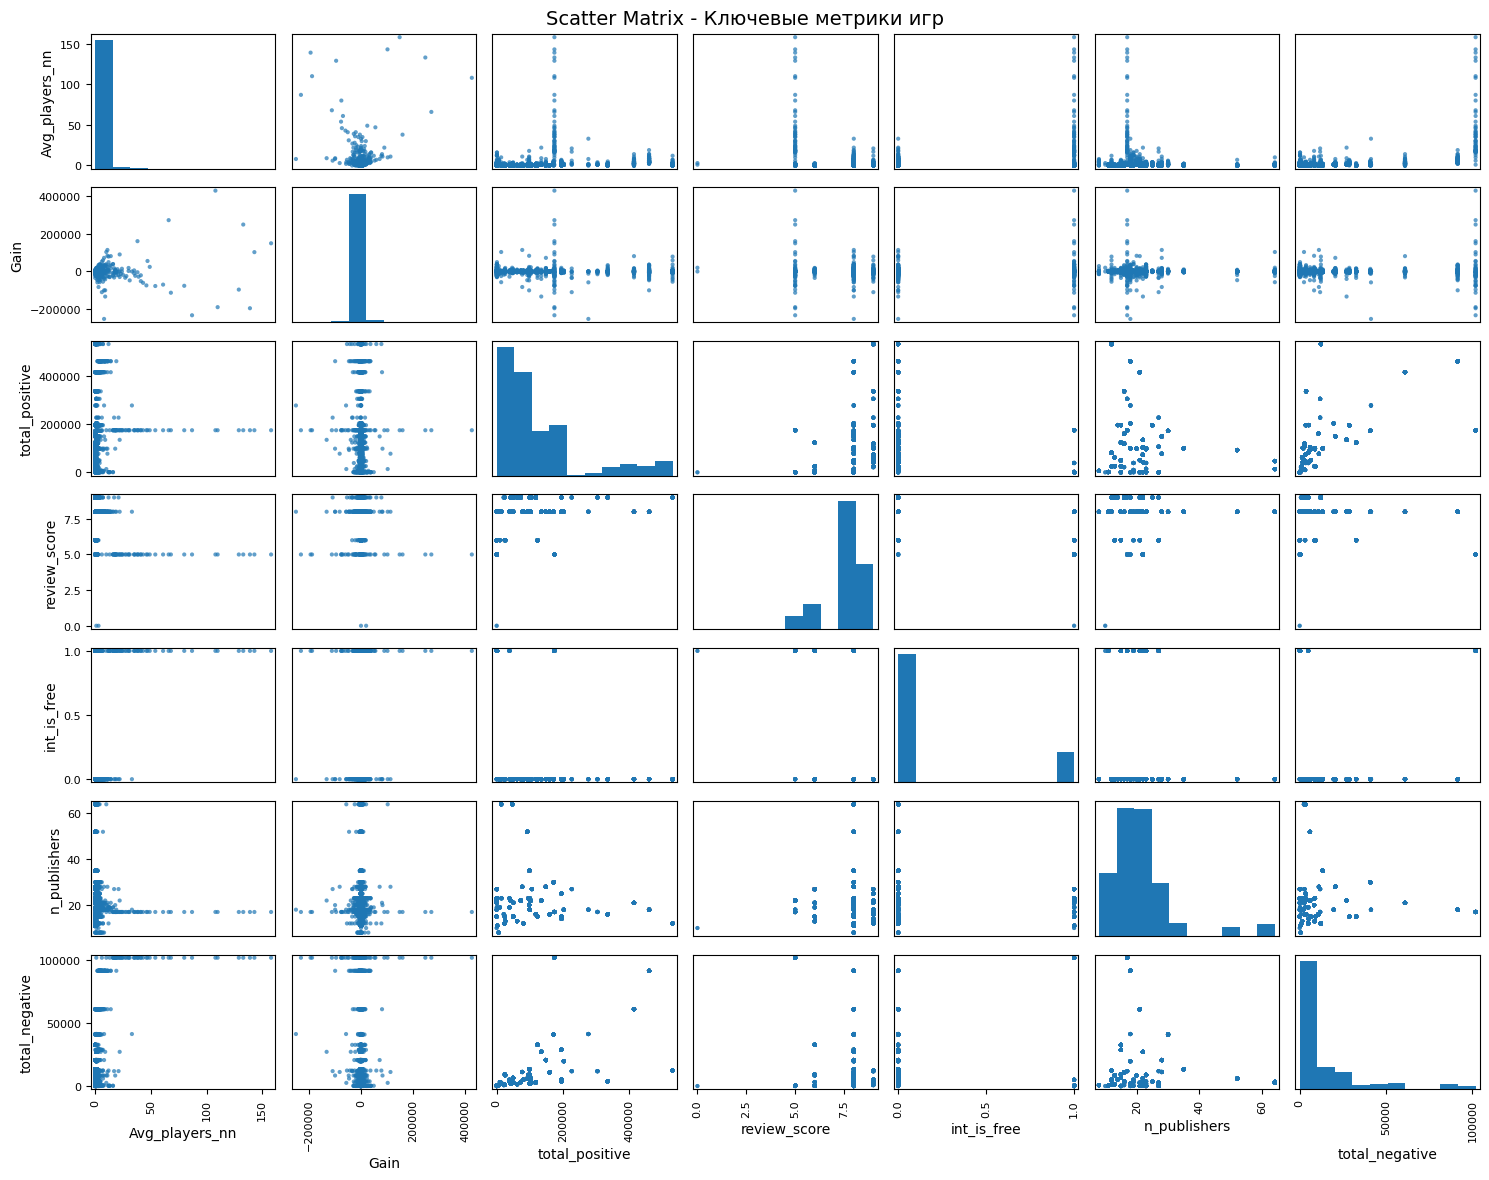

In [177]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

df_copy['Avg_players_nn'] = df_copy['df_copyAvg_players'] // 10000
# Фокус на ключевых метриках
key_metrics = ['Avg_players_nn', 'Gain', 'total_positive', 'review_score', 'int_is_free', 'n_publishers', 'total_negative']

scatter_focus_df = df_copy[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()

У меня есть пару гипотиз по зависимостям.

Первое, что игроки чаще играют в бесплатные игры.

In [185]:
df_copy

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),platforms_n,n_developers,n_publishers,n_genres,n_categories,n_additional_content,int_is_free,Percent_Gain_Numeric,Avg_players_nn,players_group,Year,palforms__n,platforms_str
0,NaT,167102.12,-17726.28,-9.59%,400709,https://steamcharts.com/app/578080,2021-09-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,[windows],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-9.59,16.0,>100k,NaN,1,['windows']
1,NaT,184828.40,-1421.57,-0.76%,444355,https://steamcharts.com/app/578080,2021-08-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,[windows],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-0.76,18.0,>100k,NaN,1,['windows']
2,NaT,186249.97,6911.70,+3.85%,413274,https://steamcharts.com/app/578080,2021-07-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,[windows],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,3.85,18.0,>100k,NaN,1,['windows']
3,NaT,179338.27,-5362.95,-2.90%,427913,https://steamcharts.com/app/578080,2021-06-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,[windows],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-2.90,17.0,>100k,NaN,1,['windows']
4,NaT,184701.21,-1409.44,-0.76%,419509,https://steamcharts.com/app/578080,2021-05-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,[windows],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-0.76,18.0,>100k,NaN,1,['windows']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,NaT,2613.04,-1568.89,-37.52%,11250,https://steamcharts.com/app/1222670,2020-10-01,the sims 4,1222670,the sims 4,['Maxis'],['Electronic Arts'],"['Single-player', 'Steam Trading Cards', 'Remo...","['Adventure', 'Casual', 'Simulation', 'Free To...",0,0,[windows],True,2020-06-18 00:00:00,"['The Sims™ 4 Life & Death Expansion Pack', 'T...",43665,38701,4964,8.0,Very Positive,88.6,0,True,0.0,11,9,19,53,65,1515,1,-37.52,0.0,1k-10k,NaN,1,['windows']
2935,NaT,4181.93,2536.83,+154.21%,10614,https://steamcharts.com/app/1222670,2020-09-01,the sims 4,1222670,the sims 4,['Maxis'],['Electronic Arts'],"['Single-player', 'Steam Trading Cards', 'Remo...","['Adventure', 'Casual', 'Simulation', 'Free To...",0,0,[windows],True,2020-06-18 00:00:00,"['The Sims™ 4 Life & Death Expansion Pack', 'T...",43665,38701,4964,8.0,Very Positive,88.6,0,True,0.0,11,9,19,53,65,1515,1,154.21,0.0,1k-10k,NaN,1,['windows']
2936,NaT,1645.10,-799.70,-32.71%,2291,https://steamcharts.com/app/1222670,2020-08-01,the sims 4,1222670,the sims 4,['Maxis'],['Electronic Arts'],"['Single-player', 'Steam Trading Cards', 'Remo...","['Adventure', 'Casual', 'Simulation', 'Free To...",0,0,[windows],True,2020-06-18 00:00:00,"['The Sims™ 4 Life & Dea

<Figure size 1500x1200 with 0 Axes>

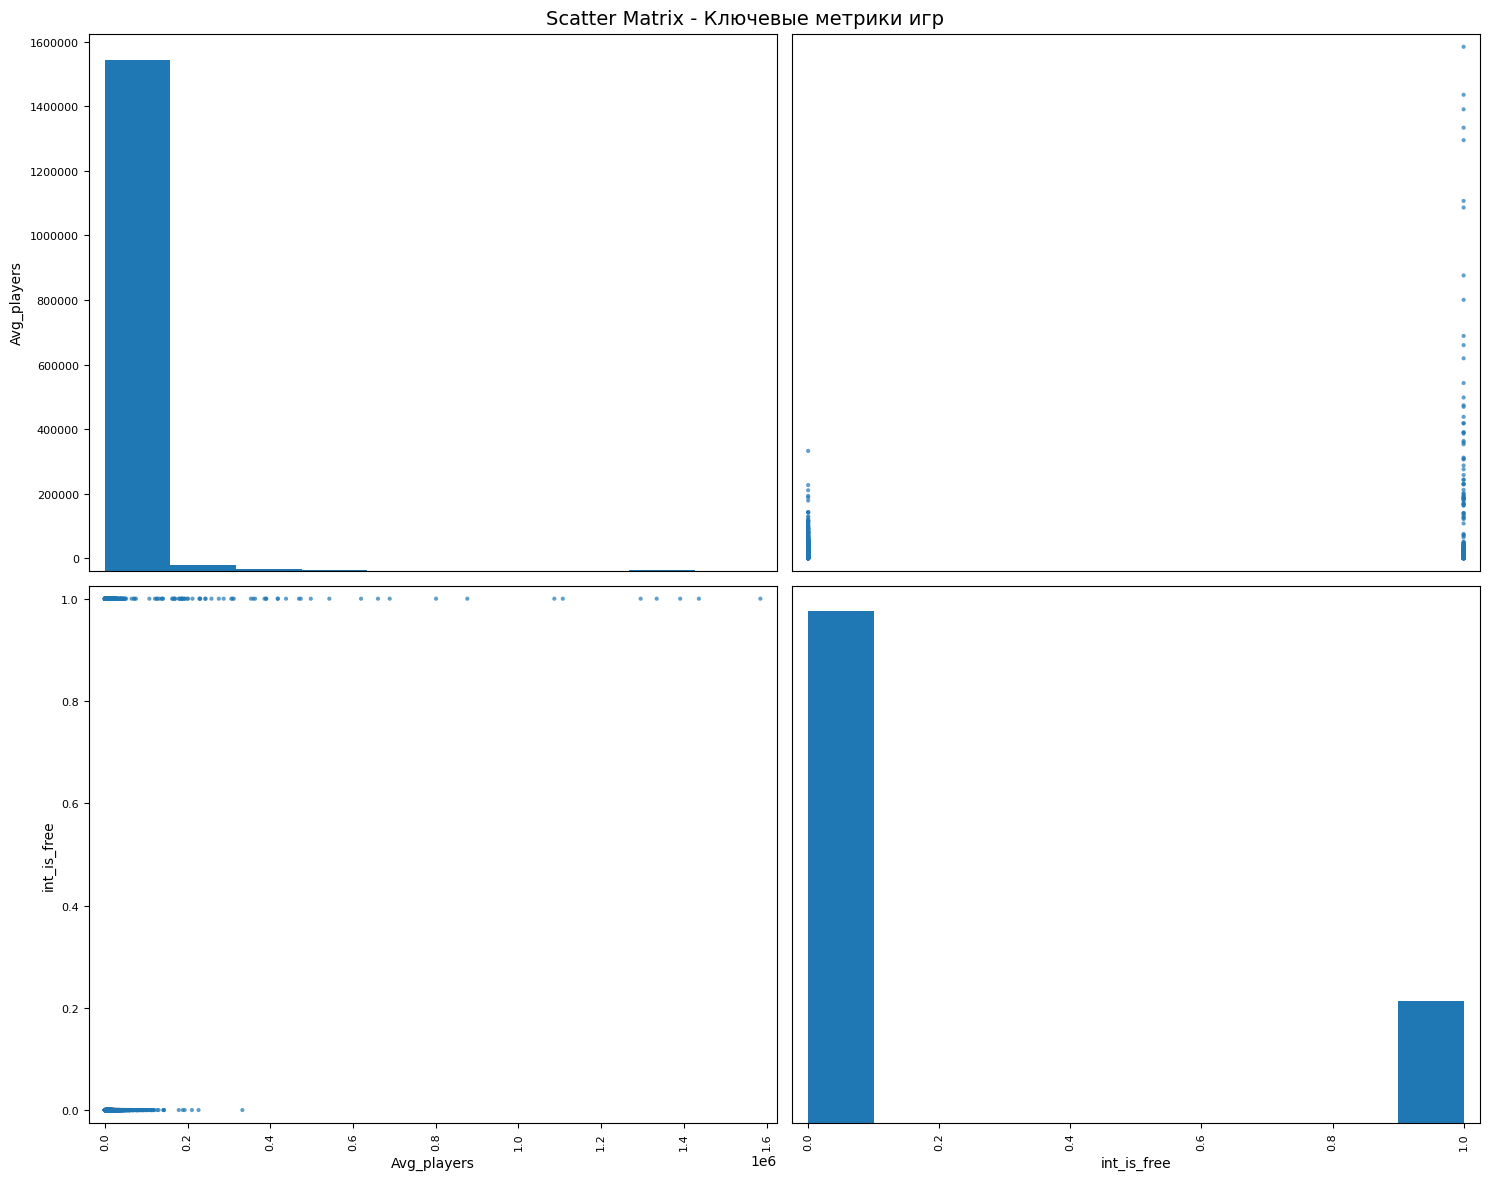

In [18]:
# Фокус на ключевых метриках
key_metrics = ['Avg_players', 'int_is_free']

scatter_focus_df = df_copy[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()

Вторая, что чем больше категорий у игры тем положительнее оценки.

<Figure size 1500x1200 with 0 Axes>

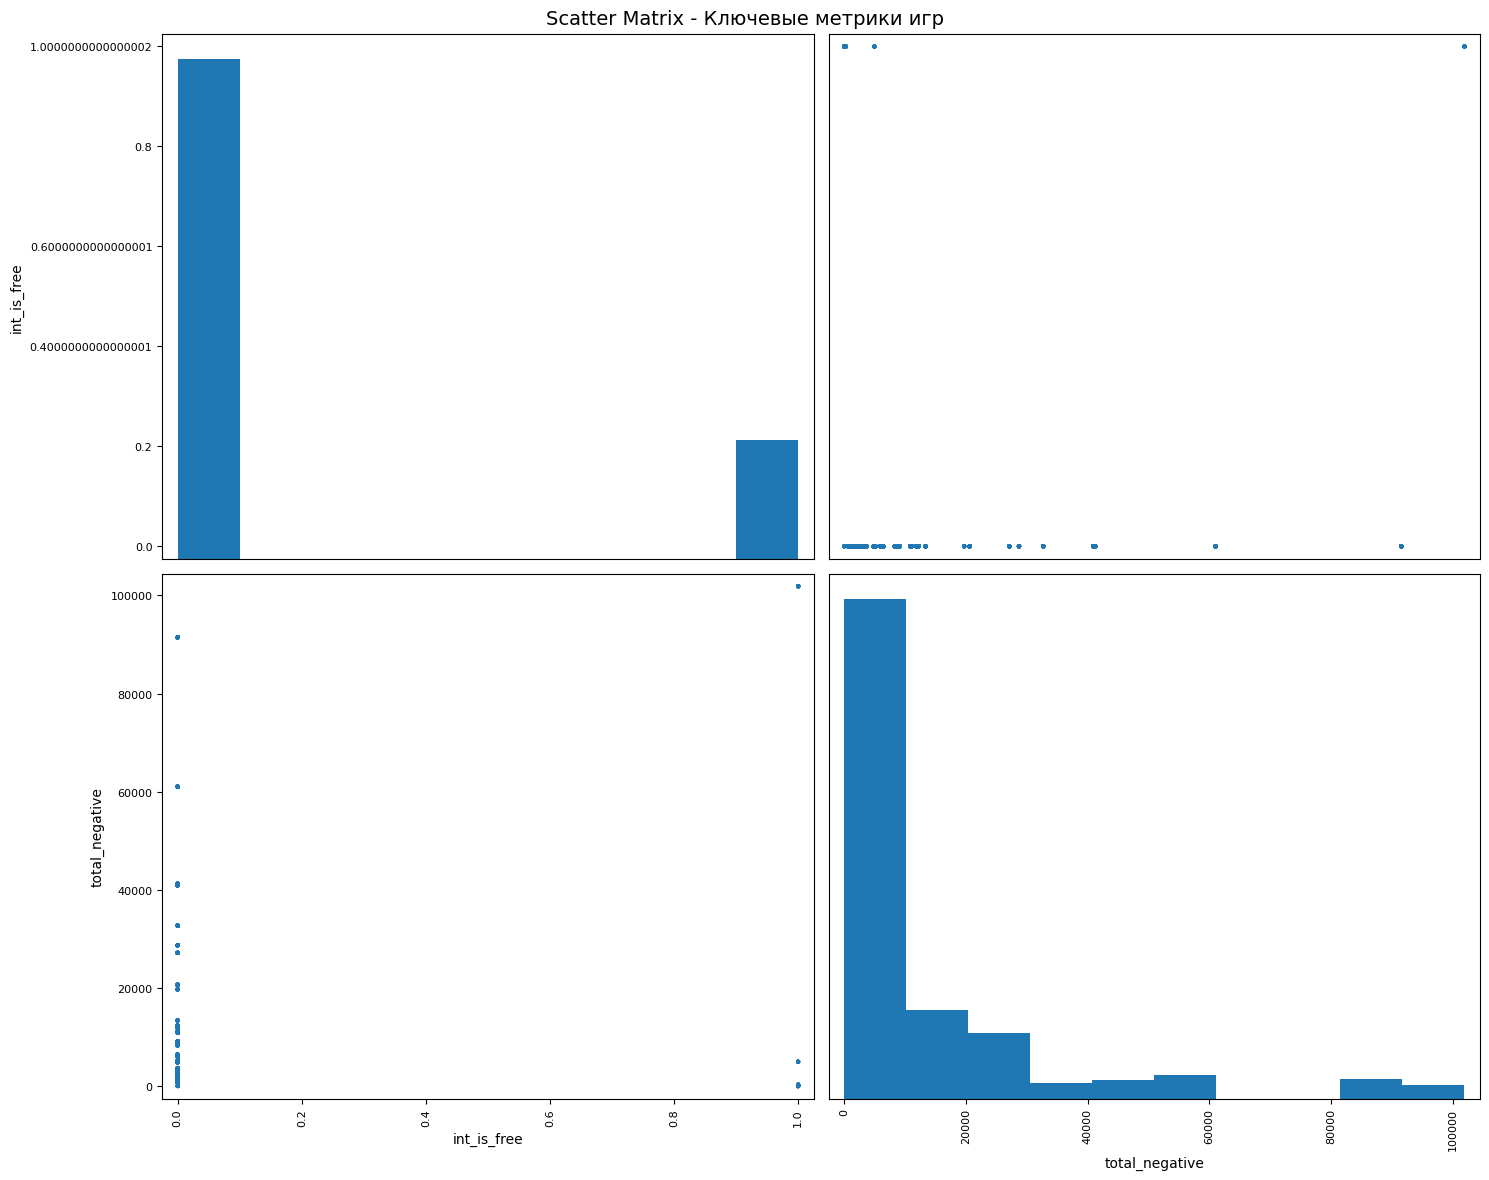

In [19]:
# Фокус на ключевых метриках
key_metrics = ['int_is_free', 'total_negative']

scatter_focus_df = df_copy[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

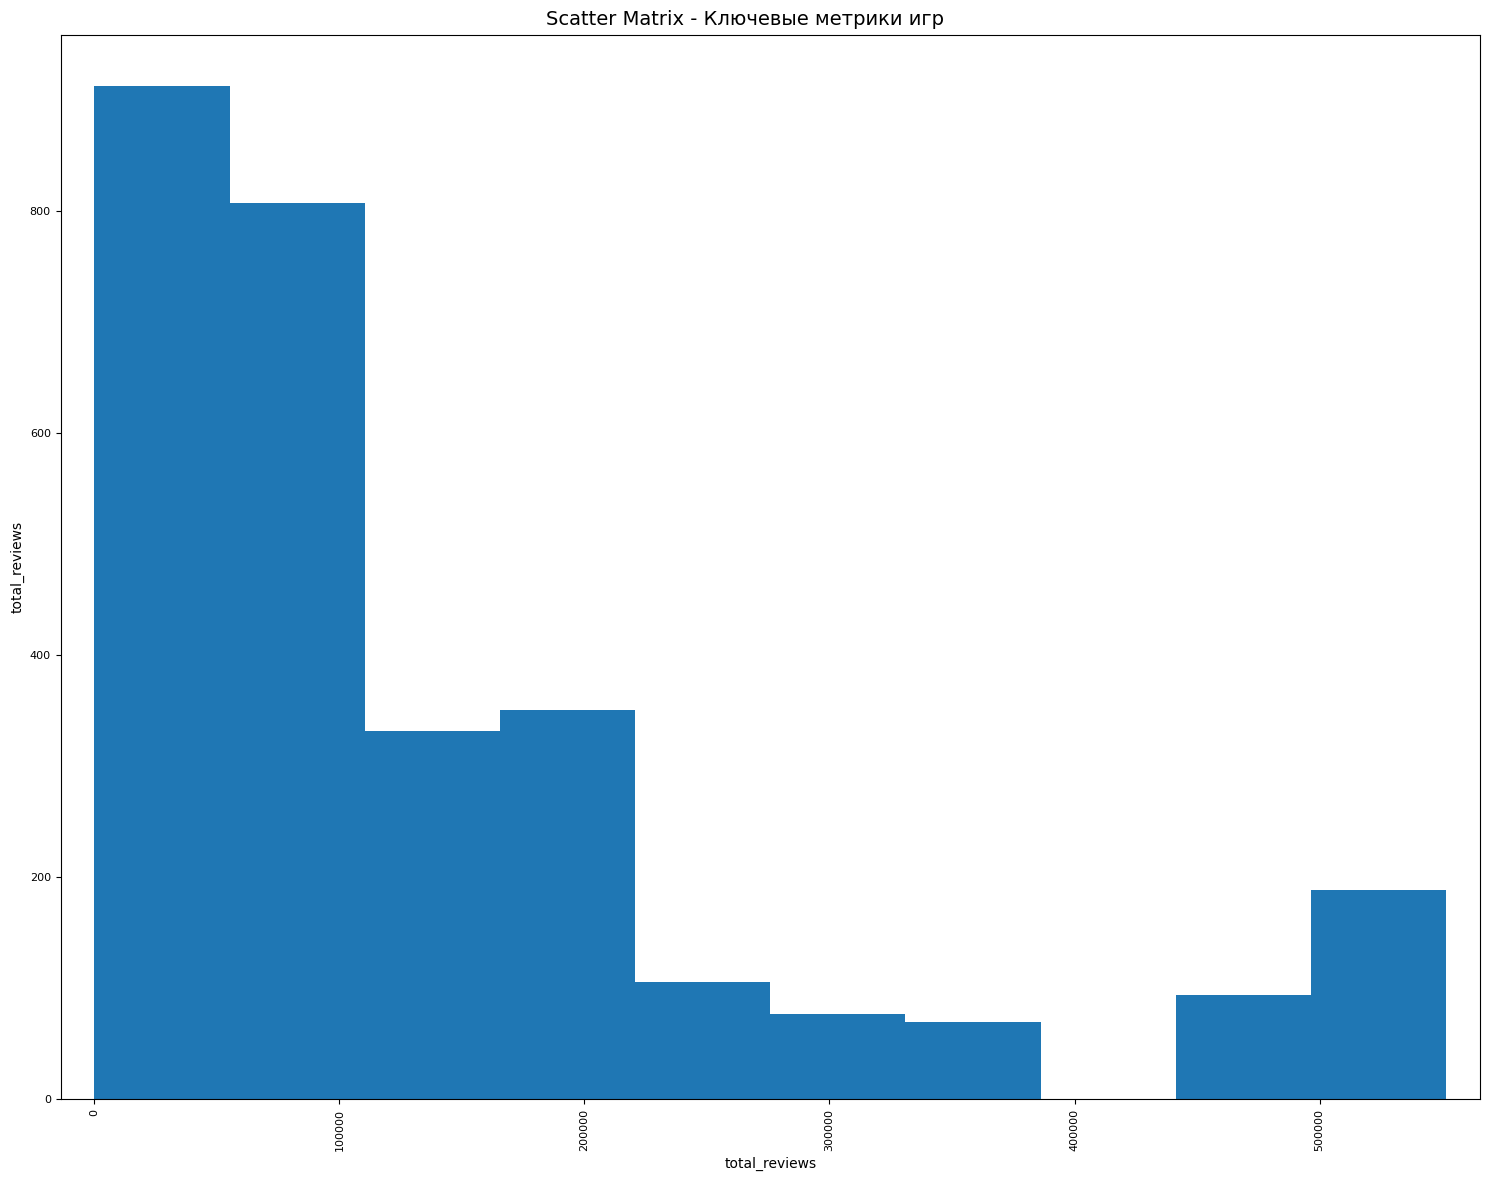

In [20]:
# Фокус на ключевых метриках
key_metrics = ['Percent_Gain', 'total_reviews']

scatter_focus_df = df_copy[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()

Третья теория. Если игра платная то у неё больне позитивных коментариев, а если платная больге нагативных.

Теория чем больше компания получает положительных отзывов тем больше она получает отрицательных отзываов

<Axes: >

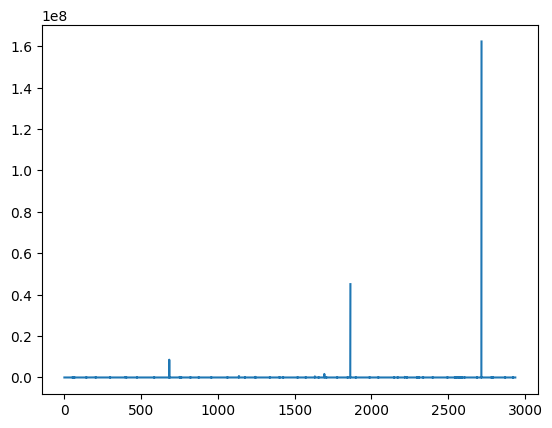

In [21]:
df_copy['Percent_Gain_Numeric'].plot()

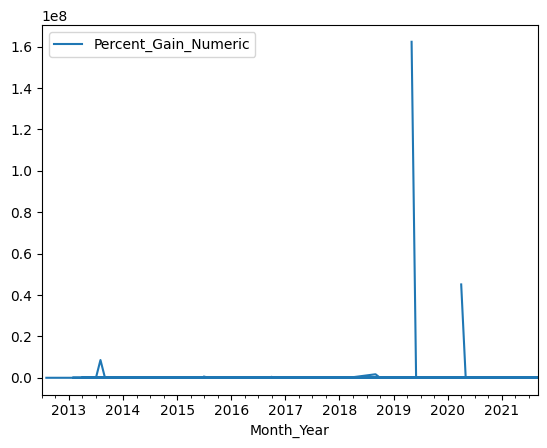

In [22]:
df_copy.plot(x='Month_Year', y='Percent_Gain_Numeric')
plt.show()

Проверим на дупликаты.

In [23]:
if df_copy.duplicated().sum() == 0:
    print("Нет дупликатов")
else:
    print("Есть дупликаты")

Нет дупликатов


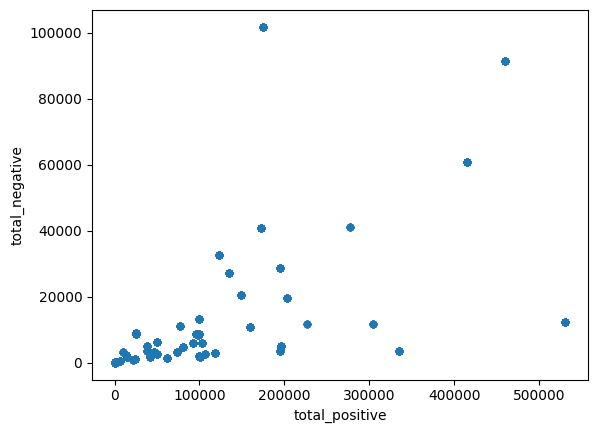

0.5704355240269288


In [25]:
df_copy.plot.scatter(x='total_positive', y='total_negative')
plt.show()
print(df_copy['total_positive'].corr(df_copy['total_negative']))


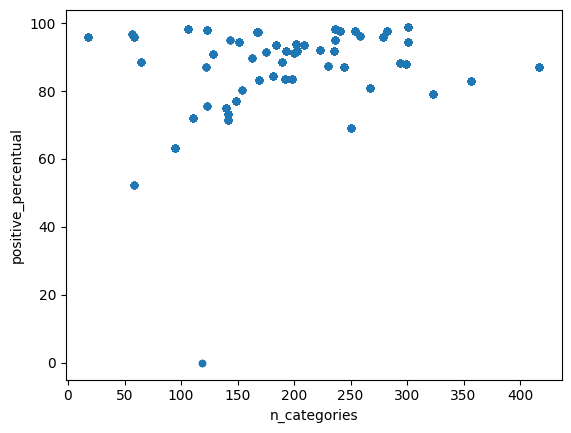

0.10887954648464833


In [26]:
df_copy.plot.scatter(x='n_categories', y='positive_percentual')
plt.show()
print(df_copy['n_categories'].corr(df_copy['positive_percentual']))


In [27]:
df_copy.groupby('is_free')['total_negative'].mean()
df_copy.groupby('is_free')['total_positive'].mean()


is_free
False    153182.977684
True      18591.810284
Name: total_positive, dtype: float64

In [28]:
df_copy.groupby('is_free')['Avg_players'].mean()

is_free
False    16690.210337
True     55071.209681
Name: Avg_players, dtype: float64

In [29]:
trend_df = df_copy.groupby('Month_Year')['Avg_players'].mean()

In [30]:
trend_df

Month_Year
2012-07     9022.770000
2012-08     2358.035000
2012-09     1959.980000
2012-10     1595.510000
2012-11     1988.075000
               ...     
2021-05    24825.890370
2021-06    23444.312407
2021-07    25552.649815
2021-08    26123.262364
2021-09    23730.945273
Freq: M, Name: Avg_players, Length: 111, dtype: float64

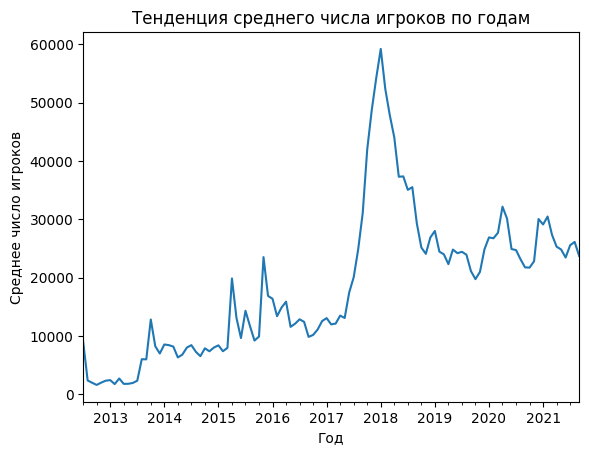

In [31]:

trend_df.plot(kind='line')
plt.title('Тенденция среднего числа игроков по годам')
plt.xlabel('Год')
plt.ylabel('Среднее число игроков')
plt.show()

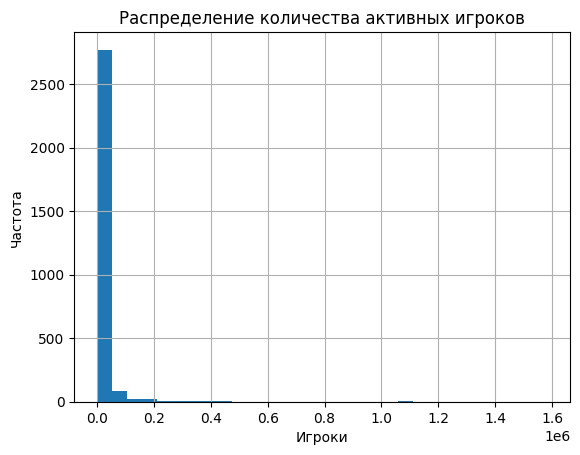

In [32]:
df_copy['Avg_players'].hist(bins=30)
plt.title('Распределение количества активных игроков')
plt.xlabel('Игроки')
plt.ylabel('Частота')
plt.show()

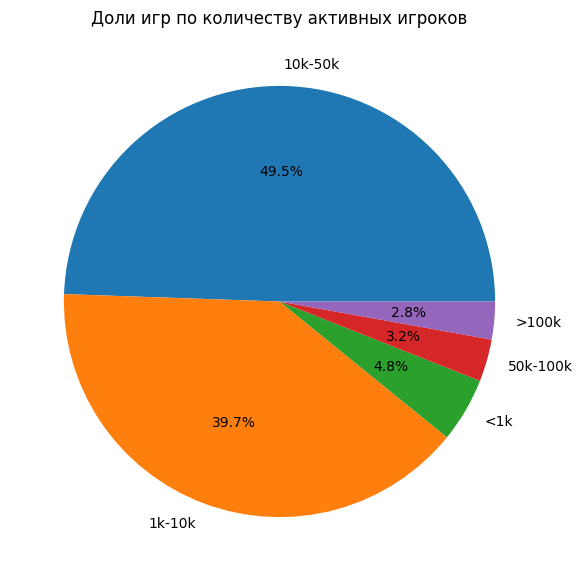

In [33]:
# Категоризация по количеству игроков (примерно, можно настроить пороги самому)
bins = [0, 1000, 10000, 50000, 100000, df_copy['Avg_players'].max()]
labels = ['<1k', '1k-10k', '10k-50k', '50k-100k', '>100k']

df_copy['players_group'] = pd.cut(df_copy['Avg_players'], bins=bins, labels=labels)

group_counts = df_copy['players_group'].value_counts()

# Круговая диаграмма:
group_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Доли игр по количеству активных игроков')
plt.ylabel('')
plt.show()

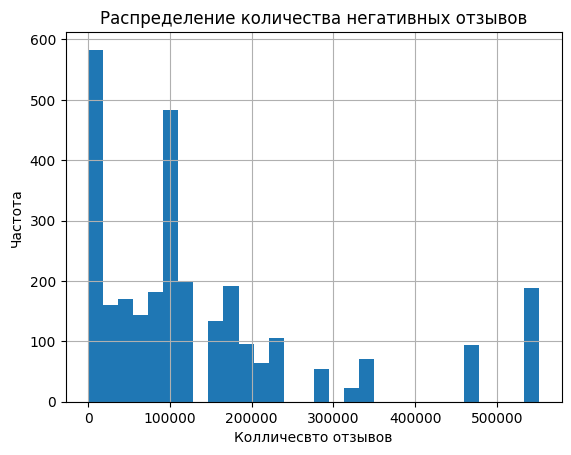

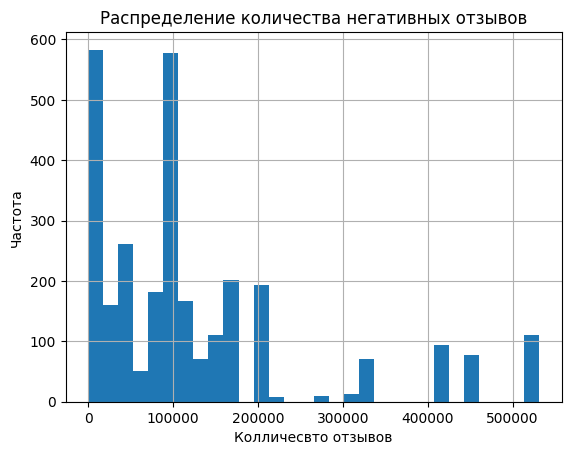

In [34]:
df_copy['total_reviews'].hist(bins=30)
plt.title('Распределение количества негативных отзывов')
plt.xlabel('Колличесвто отзывов')
plt.ylabel('Частота')
plt.show()


df_copy['total_positive'].hist(bins=30)
plt.title('Распределение количества негативных отзывов')
plt.xlabel('Колличесвто отзывов')
plt.ylabel('Частота')
plt.show()

  Month_Year  Year  Avg_players
0        NaT   NaN    167102.12
1        NaT   NaN    184828.40
2        NaT   NaN    186249.97
3        NaT   NaN    179338.27
4        NaT   NaN    184701.21
Series([], Name: Avg_players, dtype: float64)


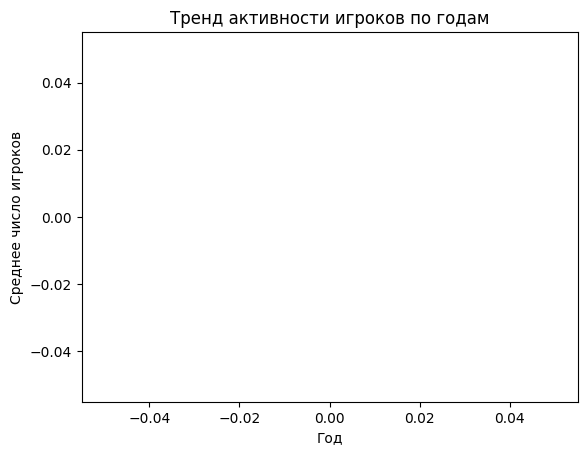

In [35]:
# Преобразование колонки дат
df_copy['Month_Year'] = pd.to_datetime(df_copy['Month_Year'], format='%Y-%m', errors='coerce')
df_copy['Year'] = df_copy['Month_Year'].dt.year

print(df_copy[['Month_Year', 'Year', 'Avg_players']].head()) # проверь, появились ли годы!

yearly_avg = df_copy.groupby('Year')['Avg_players'].mean()
print(yearly_avg)

# Визуализация тренда по годам:
yearly_avg.plot(kind='line', marker='o')
plt.title('Тренд активности игроков по годам')
plt.xlabel('Год')
plt.ylabel('Среднее число игроков')
plt.show()


In [36]:
trend_df = df_copy.groupby('Game_Name')['Avg_players'].mean()

In [37]:
trend_df.sort_values(ascending=False)

Game_Name
pubg battlegrounds                            443975.256545
apex legends                                  120382.517273
valheim                                        72749.180000
grand theft auto v                             66853.732821
cyberpunk 2077                                 51493.934000
monster hunter world                           41286.477632
rust                                           36533.376383
football manager 2020                          36298.393913
rocket league                                  35010.581711
dead by daylight                               23580.897656
fallout 4                                      22119.667465
mir4                                           20975.475000
terraria                                       19779.573243
phasmophobia                                   18796.706667
path of exile                                  18734.345521
mount blade ii bannerlord                      17999.651579
payday 2                      

In [38]:
df_copy.head()

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),platforms_n,n_developers,n_publishers,n_genres,n_categories,n_additional_content,int_is_free,Percent_Gain_Numeric,Avg_players_nn,players_group,Year
0,NaT,167102.12,-17726.28,-9.59%,400709,https://steamcharts.com/app/578080,2021-09-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,['windows'],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-9.59,16.0,>100k,NaN
1,NaT,184828.40,-1421.57,-0.76%,444355,https://steamcharts.com/app/578080,2021-08-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,['windows'],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-0.76,18.0,>100k,NaN
2,NaT,186249.97,6911.70,+3.85%,413274,https://steamcharts.com/app/578080,2021-07-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,['windows'],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,3.85,18.0,>100k,NaN
3,NaT,179338.27,-5362.95,-2.90%,427913,https://steamcharts.com/app/578080,2021-06-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,['windows'],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-2.90,17.0,>100k,NaN
4,NaT,184701.21,-1409.44,-0.76%,419509,https://steamcharts.com/app/578080,2021-05-01,pubg battlegrounds,578080,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,37,['windows'],True,2017-12-21 00:00:00,[],276211,174339,101872,5.0,Mixed,63.1,0,True,0.0,11,20,17,64,95,2,1,-0.76,18.0,>100k,NaN


In [39]:
df_more_playrs = pd.merge(
    df_valve_player_data, df_steam_games, 
    left_on='Game_Name', right_on='name', 
    how='left')

In [40]:
count_game = len(df_more_playrs['Game_Name'].unique())
print(f"Всего игр: {count_game}")

miss_data = df_more_playrs.isnull().sum()

if count_game == miss_data['Gain']:
    if count_game == miss_data['Percent_Gain']:
        print("Прорущенных данных нет в Gain и Percent_Gain")
        df_more_playrs.fillna(0, inplace=True)
    else:
        raise "В Percent_Gain не хватает данных"
else:
    raise "В Gain не хватает данных"

Всего игр: 98
Прорущенных данных нет в Gain и Percent_Gain


In [41]:
print(f"Успешно объединено {len(df_more_playrs)} записей из {len(df_valve_player_data)}")

Успешно объединено 5271 записей из 5271


In [42]:
df_more_playrs.head(5)

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0


In [43]:
df_more_playrs['Month_Year'] = pd.to_datetime(df_more_playrs['Month_Year'], format='%B %Y').dt.to_period('M')

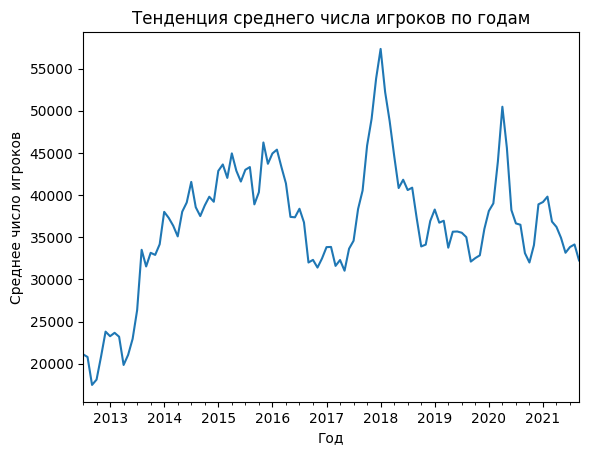

In [44]:
trend_df = df_more_playrs.groupby('Month_Year')['Avg_players'].mean()

trend_df.plot(kind='line')
plt.title('Тенденция среднего числа игроков по годам')
plt.xlabel('Год')
plt.ylabel('Среднее число игроков')
plt.show()

In [45]:
!pip install seaborn

In [50]:
import matplotlib.pyplot as plt

import numpy as np

from datetime import datetime


df_more_playrs['Month'] = df_more_playrs['Month_Year'].dt.month
df_more_playrs['Year'] = df_more_playrs['Month_Year'].dt.year
df_more_playrs['Month_Name'] = df_more_playrs['Month_Year'].dt.strftime('%B')

# Сортируем по дате
df_more_players = df_more_playrs.sort_values('Month_Year')

# Создаем данные для визуализации
monthly_stats = df_more_playrs.groupby(['Year', 'Month', 'Month_Name']).agg({
    'Avg_players': 'mean',
    'Peak_Players': 'mean',
    'total_positive': 'mean',
    'total_negative': 'mean'
}).reset_index()

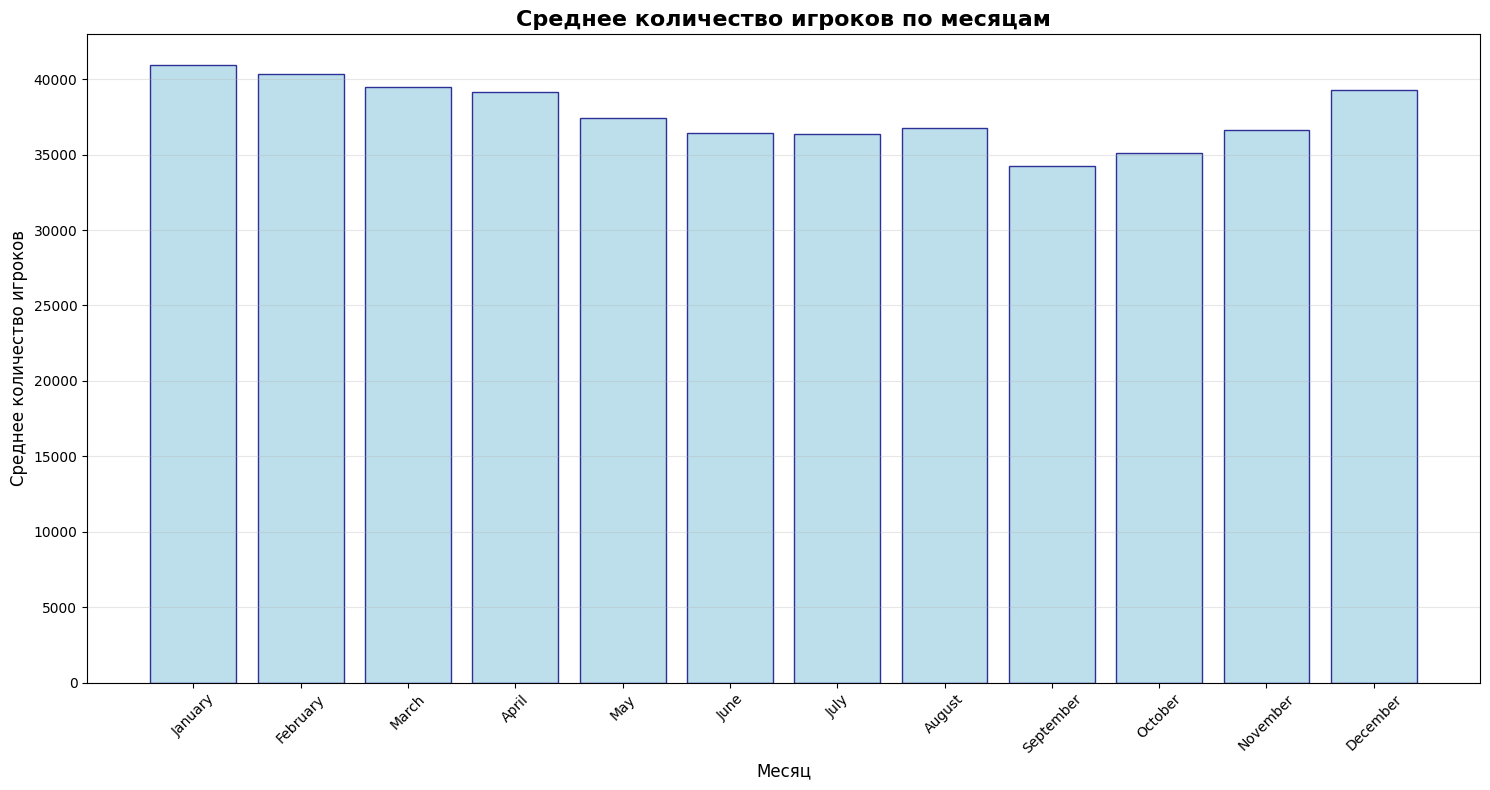

In [51]:
plt.figure(figsize=(15, 8))

# Создаем позиции для столбцов
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# Группируем данные по месяцам
monthly_avg = df_more_playrs.groupby('Month_Name')['Avg_players'].mean().reindex(months)

plt.bar(monthly_avg.index, monthly_avg.values, color='lightblue', edgecolor='navy', alpha=0.8)
plt.title('Среднее количество игроков по месяцам', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Среднее количество игроков', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

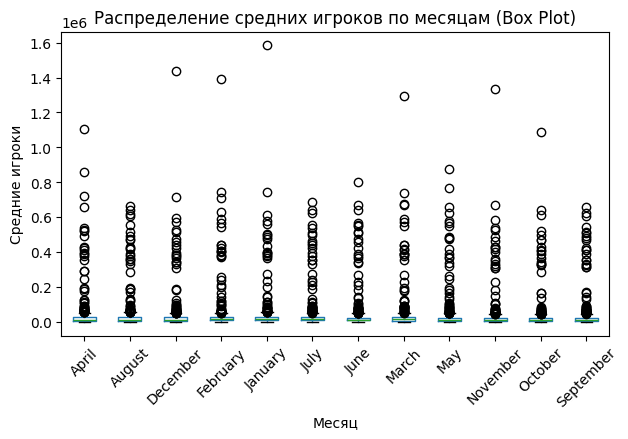

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Создаем Box Plot для Avg_players по месяцам
plt.figure(figsize=(12, 6))
df_more_players.boxplot(column='Avg_players', by='Month_Name', grid=False)
plt.title('Распределение средних игроков по месяцам (Box Plot)')
plt.suptitle('')  # Убираем автоматический заголовок
plt.xlabel('Месяц')
plt.ylabel('Средние игроки')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

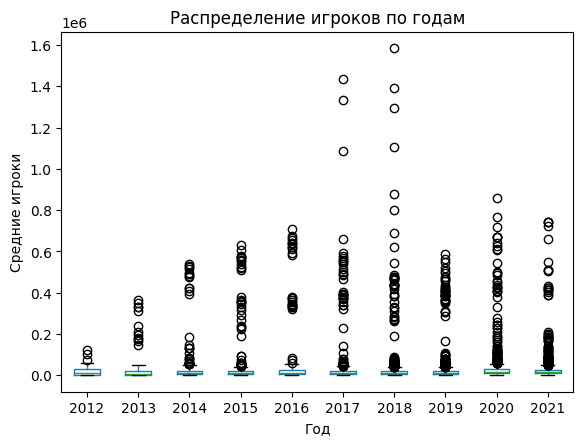

In [53]:
# Box Plot по годам
plt.figure(figsize=(10, 6))
df_more_players.boxplot(column='Avg_players', by='Year', grid=False)
plt.title('Распределение игроков по годам')
plt.suptitle('')
plt.xlabel('Год')
plt.ylabel('Средние игроки')
plt.show()

In [108]:
months_count_df = df_more_playrs.groupby('Game_Name').size().reset_index(name='months_count')

df_more_players = df_more_players.merge(months_count_df, on='Game_Name', how='inner')

In [112]:
df_more_players

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Month,Year,Month_Name,months_count,Avg_players_nn
0,2012-07,27448.46,0.00,0,50756,https://steamcharts.com/app/8930,2012-07-01,sid meiers civilization v,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.00,7,2012,July,111,16.0
1,2012-07,9022.77,0.00,0,16097,https://steamcharts.com/app/105600,2012-07-01,terraria,105600.0,terraria,['Re-Logic'],['Re-Logic'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure', 'Indie', 'RPG']",83.0,115.0,"['windows', 'mac', 'linux']",True,2011-05-16 00:00:00,"['Terraria: Official Soundtrack', 'Terraria: O...",543537.0,531256.0,12281.0,9.0,Overwhelmingly Positive,97.7,83.0,False,9.99,7,2012,July,111,18.0
2,2012-07,932.57,0.00,0,1642,https://steamcharts.com/app/730,2012-07-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.00,7,2012,July,111,18.0
3,2012-07,12228.47,0.00,0,21811,https://steamcharts.com/app/550,2012-07-01,left 4 dead 2,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.00,7,2012,July,111,17.0
4,2012-07,7965.94,0.00,0,12253,https://steamcharts.com/app/4000,2012-07-01,garrys mod,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.00,7,2012,July,111,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,2021-09,11068.81,-2524.27,-18.57%,18529,https://steamcharts.com/app/1281930,2021-09-01,tmodloader,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.00,9,2021,September,17,NaN
5267,2021-09,15274.20,-1079.31,-6.60%,26175,https://steamcharts.com/app/438100,2021-09-01,vrchat,438100.0,vrchat,['VRChat Inc.'],['VRChat Inc.'],"['Multi-player', 'MMO', 'PvP', 'Online PvP', '...","['Adventure', 'Casual', 'Massively Multiplayer...",0.0,0.0,['windows'],True,2017-02-01 00:00:00,[],110.0,92.0,18.0,8.0,Very Positive,83.6,0.0,True,0.00,9,2021,September,57,NaN
5268,2021-09,16329.35,-398.91,-2.38%,26521,https://steamcharts.com/app/291550,2021-09-01,brawlhalla,291550.0,brawlhalla,['Blue Mammoth Games'],['Ubisoft'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Indie', 'Free To Play']",0.0,57.0,"['windows', 'mac']",True,2017-10-17 00:00:00,"['Brawlhalla - Collectors Pack', 'Brawlhalla -...",1575.0,1307.0,268.0,8.0,Very Positive,83.0,0.0,True,0.00,9,2021,September,90,NaN
5269,2021-09,167102.12,-17726.28,-9.59%,400709,https://steamcharts.com/app/578080,2021-09-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.00,9,2021,September,55,NaN


<Figure size 1500x1200 with 0 Axes>

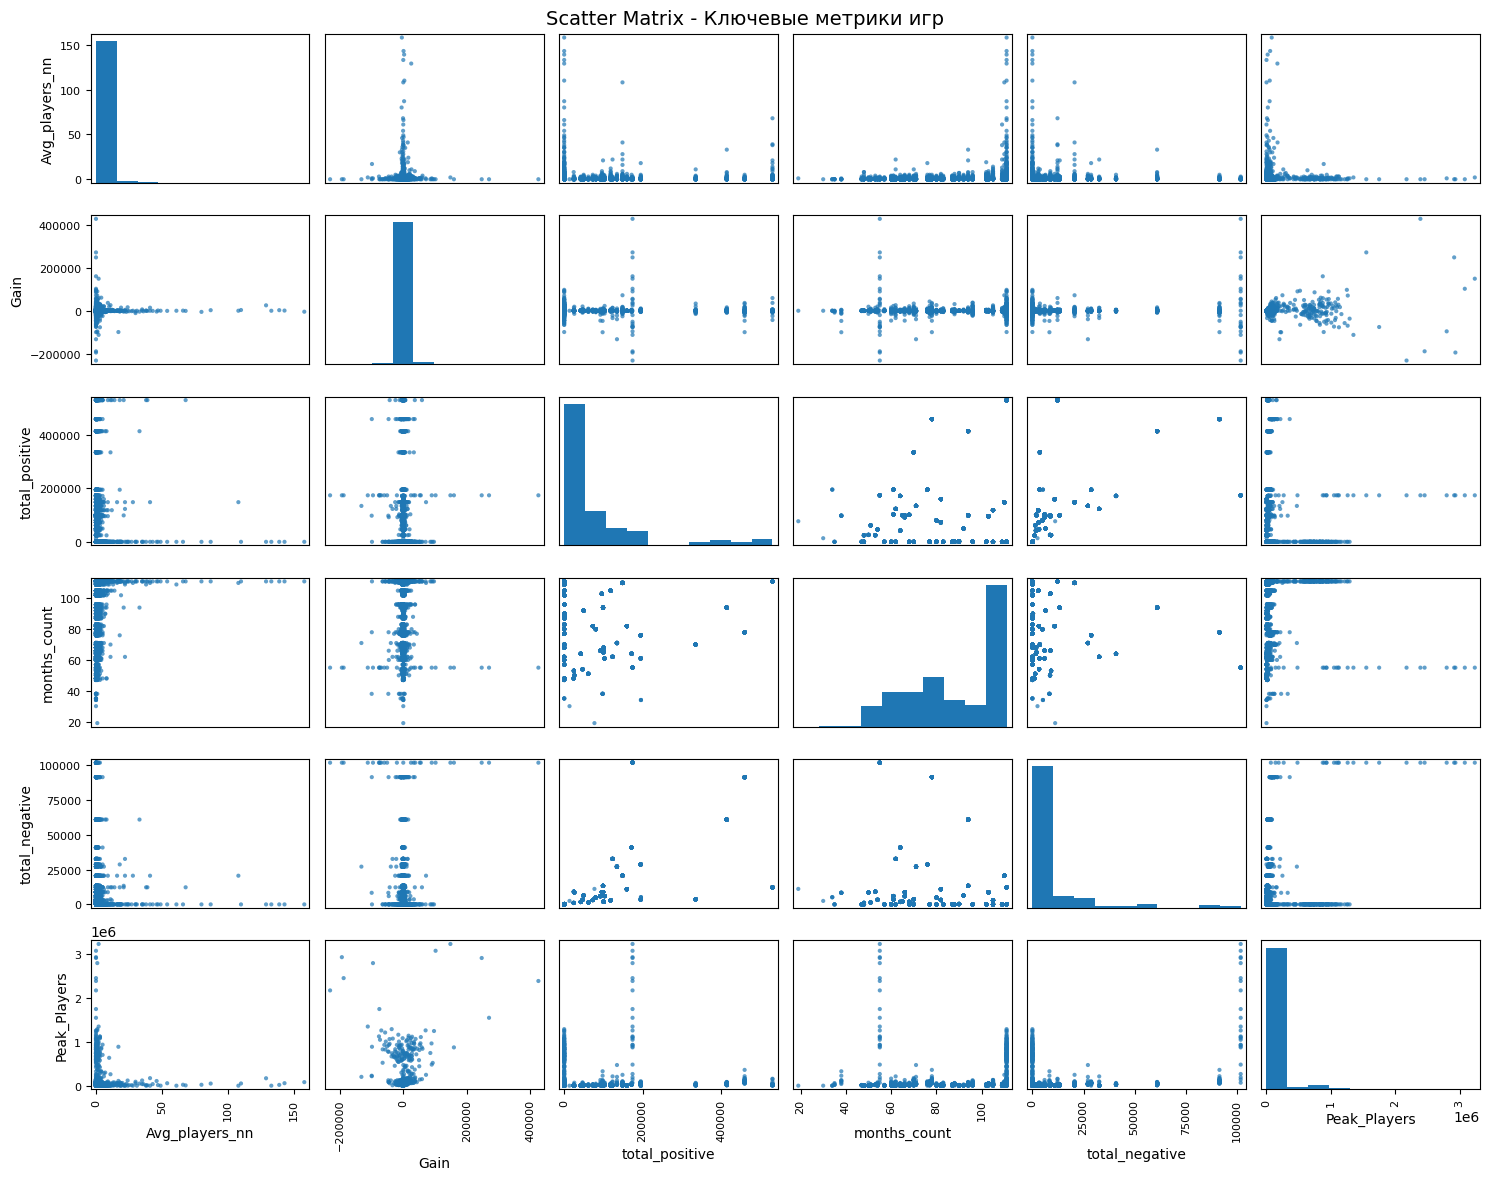

In [127]:
df_more_players['Avg_players_nn'] = df_copy['Avg_players'] // 10000
# Фокус на ключевых метриках
key_metrics = ['Avg_players_nn', 'Gain', 'total_positive', 'months_count', 'total_negative'
              , 'Peak_Players']

scatter_focus_df = df_more_players[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

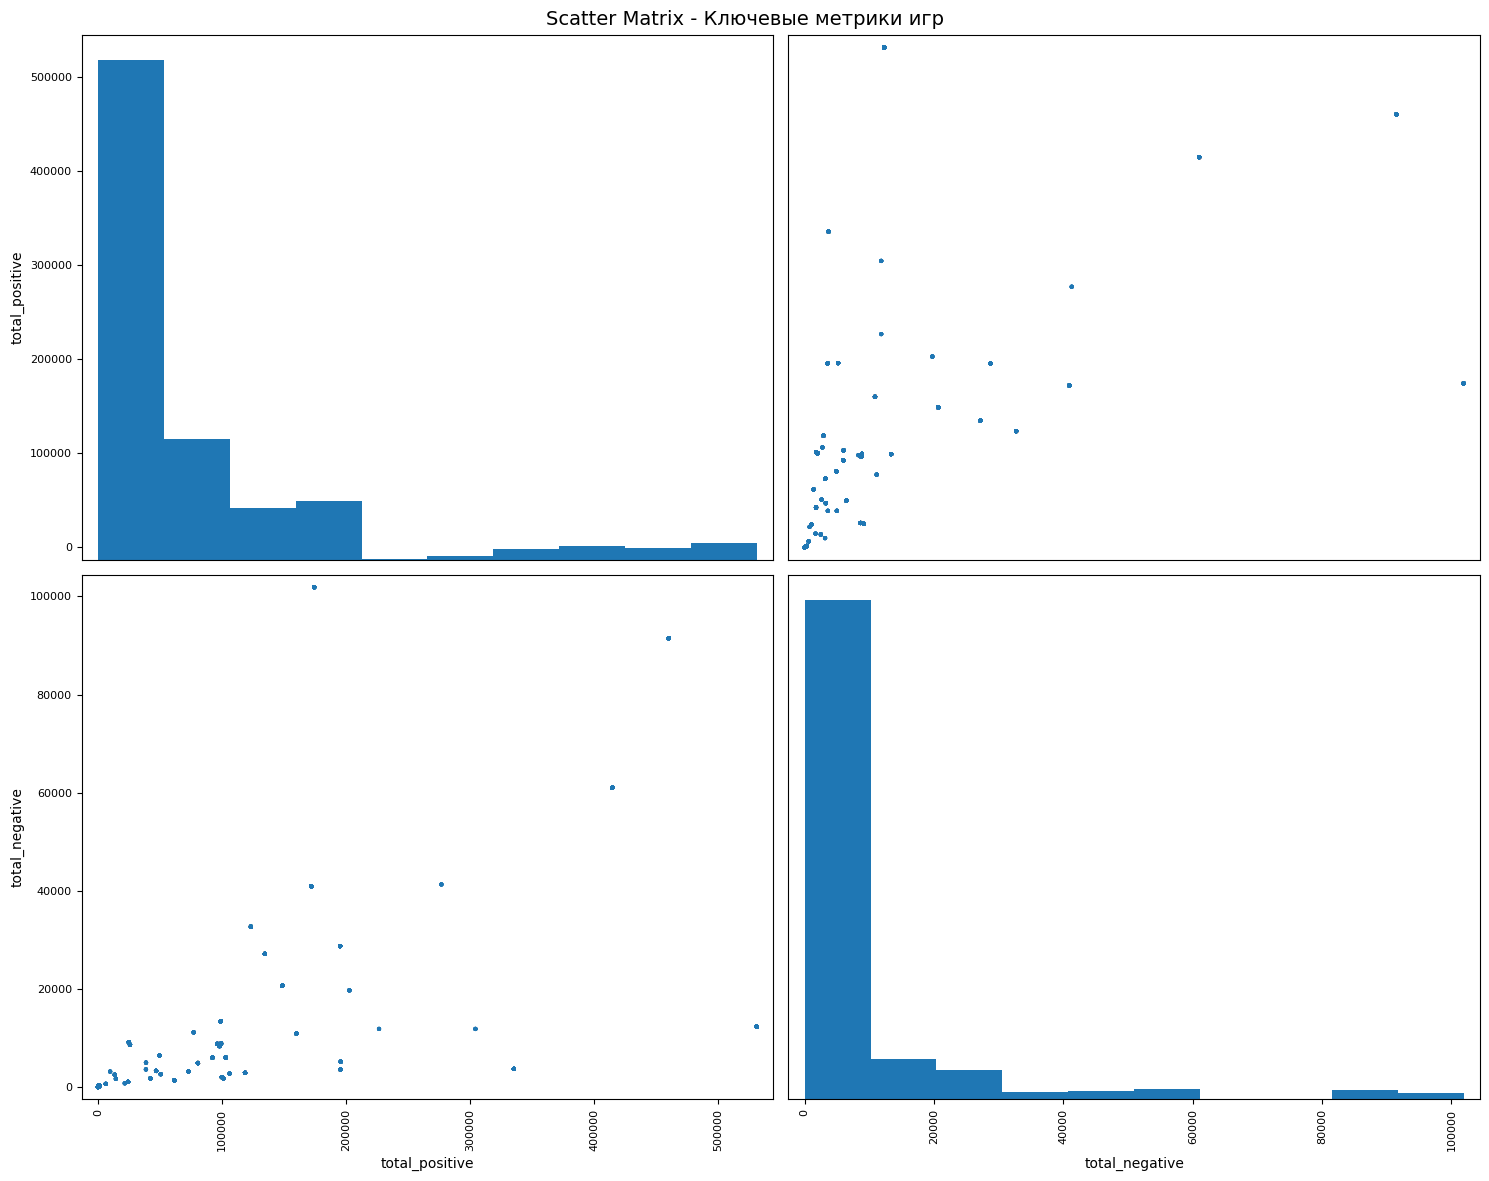

In [176]:
df_more_players['Avg_players_nn'] = df_copy['Avg_players'] // 10000
# Фокус на ключевых метриках
key_metrics = ['total_positive', 'total_negative']

scatter_focus_df = df_more_players[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
df_more_players['Avg_players_nn'] = df_copy['Avg_players'] // 10000
# Фокус на ключевых метриках
key_metrics = ['total_positive', 'total_negative']

scatter_focus_df = df_more_players[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()

In [55]:
columns = ['Avg_players', 'int_is_free', 'Peak_Players', 'Percent_Gain_Numeric', 'total_positive', 'total_negative']

for col in columns:
    if col in df_copy.columns:
        print(f"\n=== Статистика для {col} ===")
        print(f"Среднее: {df_copy[col].mean():.2f}")
        print(f"Медиана: {df_copy[col].median():.2f}")
        print(f"Стандартное отклонение: {df_copy[col].std():.2f}")
        print(f"Минимум: {df_copy[col].min():.2f}")
        print(f"Максимум: {df_copy[col].max():.2f}")


=== Статистика для Avg_players ===
Среднее: 24055.60
Медиана: 11172.00
Стандартное отклонение: 80352.28
Минимум: 0.00
Максимум: 1584886.77

=== Статистика для int_is_free ===
Среднее: 0.19
Медиана: 0.00
Стандартное отклонение: 0.39
Минимум: 0.00
Максимум: 1.00

=== Статистика для Peak_Players ===
Среднее: 49377.28
Медиана: 20831.00
Стандартное отклонение: 174950.53
Минимум: 0.00
Максимум: 3236027.00

=== Статистика для Percent_Gain_Numeric ===
Среднее: inf
Медиана: -0.15
Стандартное отклонение: nan
Минимум: -100.00
Максимум: inf

=== Статистика для total_positive ===
Среднее: 127354.66
Медиана: 99024.00
Стандартное отклонение: 134686.01
Минимум: 0.00
Максимум: 531256.00

=== Статистика для total_negative ===
Среднее: 13979.60
Медиана: 5950.00
Стандартное отклонение: 22207.92
Минимум: 0.00
Максимум: 101872.00


C:\Users\user\Desktop\data_nasa_prochect\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


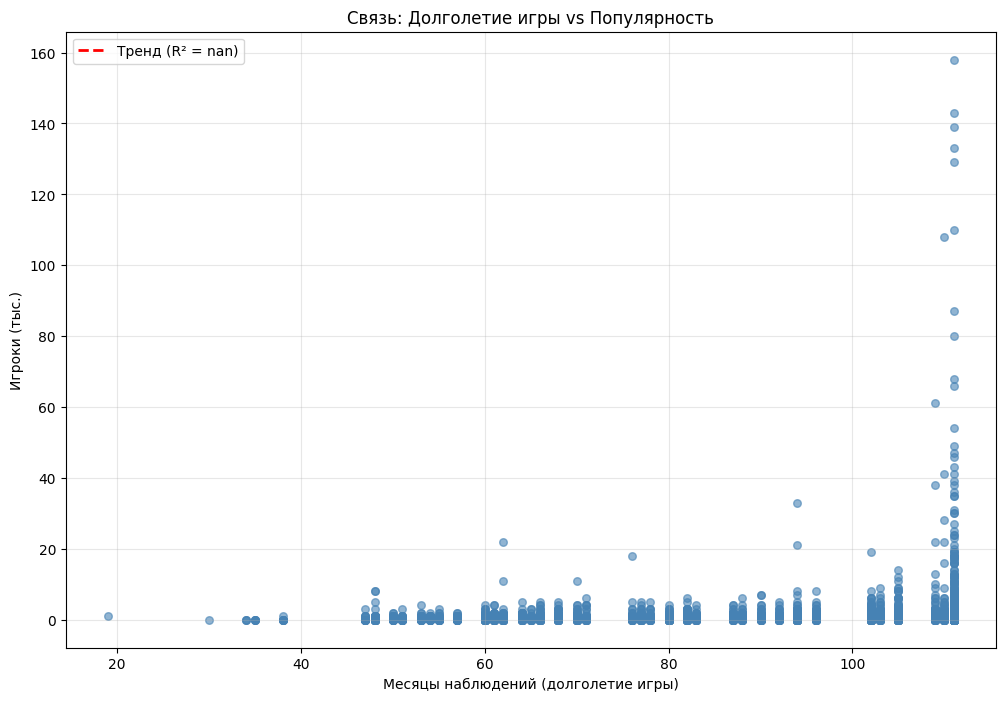

In [121]:
plt.figure(figsize=(12, 8))
plt.scatter(df_more_players['months_count'], df_more_players['Avg_players_nn'], 
           alpha=0.6, s=30, color='steelblue')
plt.xlabel('Месяцы наблюдений (долголетие игры)')
plt.ylabel('Игроки (тыс.)')
plt.title('Связь: Долголетие игры vs Популярность')
plt.grid(True, alpha=0.3)

# Линия тренда
z = np.polyfit(df_more_players['months_count'], df_more_players['Avg_players_nn'], 1)
p = np.poly1d(z)
plt.plot(df_more_players['months_count'], p(df_more_players['months_count']), 
         "r--", linewidth=2, label=f'Тренд (R² = {np.corrcoef(df_more_players["months_count"], df_more_players["Avg_players_nn"])[0,1]:.3f})')
plt.legend()
plt.show()

In [126]:
corelation = df_more_players['months_count'].corr(df_more_players['Avg_players_nn'])

print(corelation)

0.15685868451734236


Если игра бесплатна она унас получает больше игроков -> больше Peak_Players. Также мы видим что если игра бесплатная то она получает много отрицательных и положительных отзывов. И если игра получает много положительных то она получает и много отрицательных отзывово.

In [57]:
df_copy['platforms'].apply(len)

0       11
1       11
2       11
3       11
4       11
        ..
2934    11
2935    11
2936    11
2937    11
2938    11
Name: platforms, Length: 2939, dtype: int64

In [58]:
import ast
df_copy['platforms'] = df_copy['platforms'].apply(ast.literal_eval)

# Теперь apply(len) будет работать правильно
df_copy['palforms__n'] = df_copy['platforms'].apply(len)

In [59]:
df_copy.dtypes

Month_Year              datetime64[ns]
Avg_players                    float64
Gain                           float64
Percent_Gain                    object
Peak_Players                     int64
URL                             object
Date                            object
Game_Name                       object
steam_appid                      int64
name                            object
developers                      object
publishers                      object
categories                      object
genres                          object
required_age                     int64
n_achievements                   int64
platforms                       object
is_released                       bool
release_date                    object
additional_content              object
total_reviews                    int64
total_positive                   int64
total_negative                   int64
review_score                   float64
review_score_desc               object
positive_percentual      

In [60]:
df_copy['palforms__n'] = df_copy['platforms'].apply(len)

In [61]:
df_copy['platforms_str'] = df_copy['platforms'].astype(str)

In [62]:
print(df_copy.groupby('platforms_str')['palforms__n'].count())

platforms_str
['windows', 'linux']            110
['windows', 'mac', 'linux']    1075
['windows', 'mac']              644
['windows']                    1110
Name: palforms__n, dtype: int64


У игры больше игроков если у она распространяеться на ОС windows

<Figure size 1500x1200 with 0 Axes>

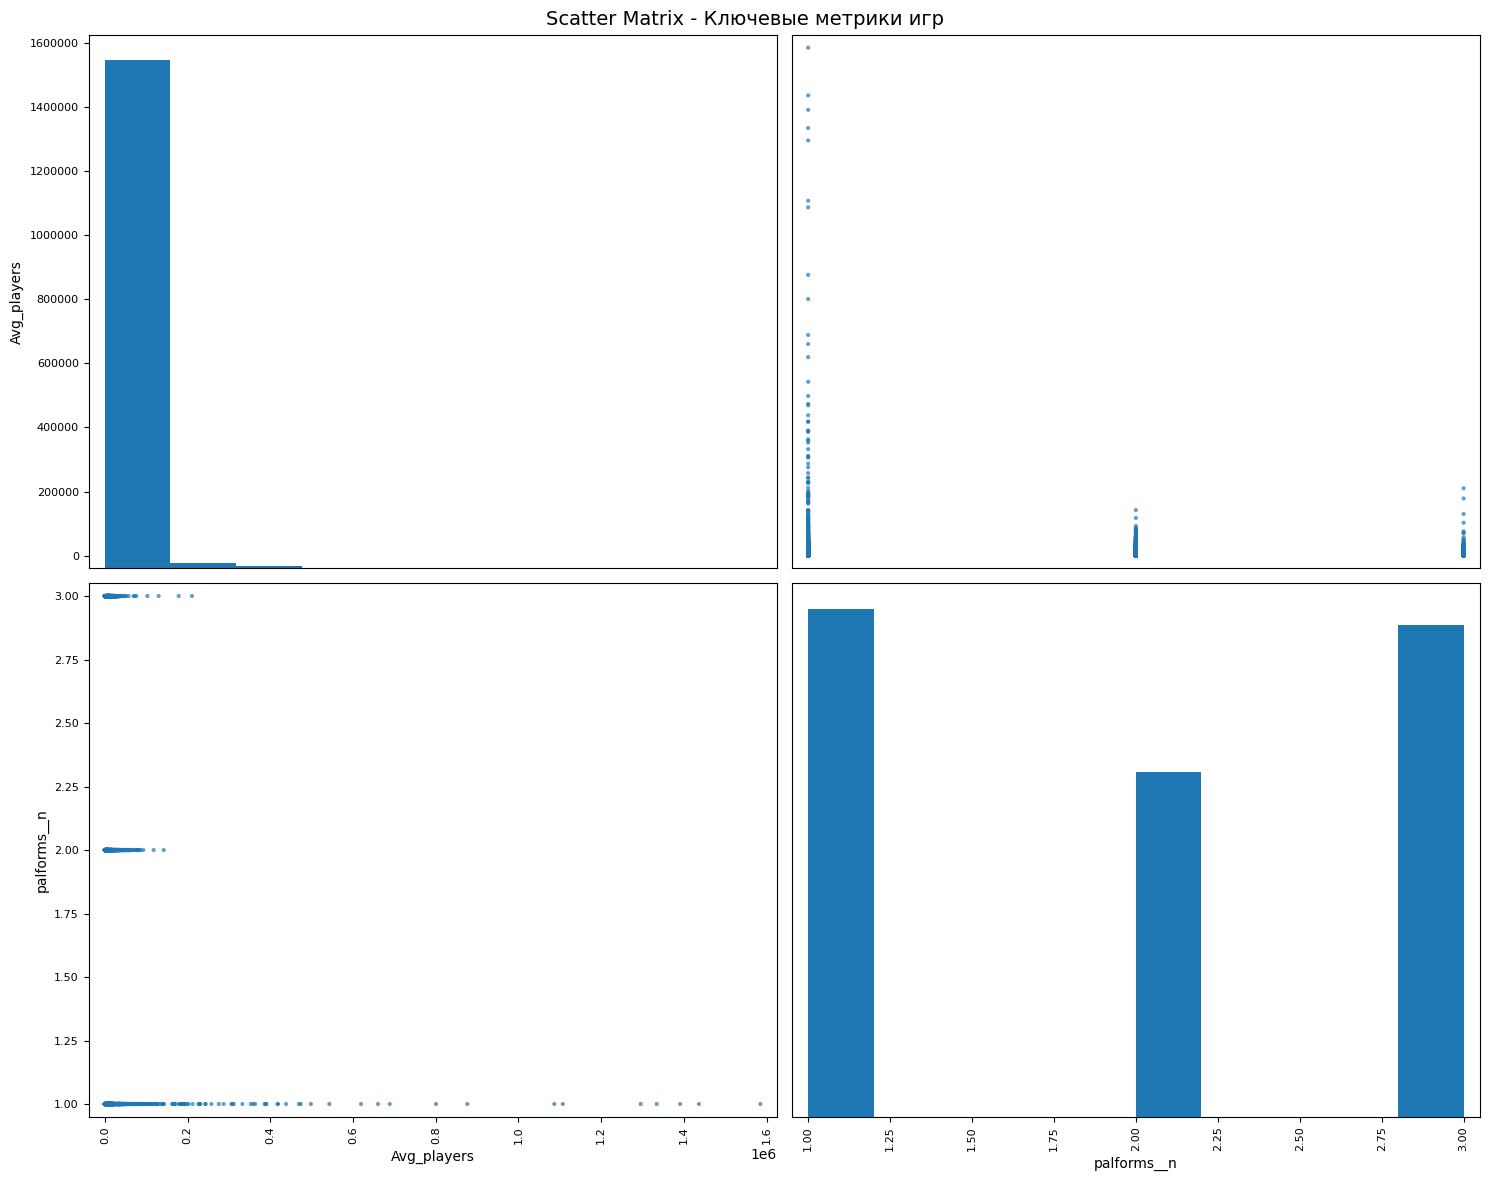

In [63]:
# Фокус на ключевых метриках
key_metrics = ['Avg_players', 'palforms__n']

scatter_focus_df = df_copy[key_metrics].dropna()

plt.figure(figsize=(15, 12))
scatter_matrix(scatter_focus_df, alpha=0.7, figsize=(15, 12), diagonal='hist')
plt.suptitle('Scatter Matrix - Ключевые метрики игр', fontsize=14)
plt.tight_layout()
plt.show()

In [64]:
df_copy.corr(numeric_only=True)

,Avg_players,Gain,Peak_Players,steam_appid,required_age,n_achievements,is_released,total_reviews,total_positive,total_negative,review_score,positive_percentual,metacritic,is_free,price_initial (USD),platforms_n,n_developers,n_publishers,n_genres,n_categories,n_additional_content,int_is_free,Percent_Gain_Numeric,Avg_players_nn,Year,palforms__n
Avg_players,1.000000,0.081043,0.995334,0.080249,-0.115635,-0.024951,NaN,0.184386,0.121821,0.493964,-0.246145,-0.281259,-0.115635,0.188132,-0.131040,-0.154821,-0.016121,-0.045722,0.077522,-0.137119,-0.057088,0.188132,0.022755,0.999347,NaN,-0.158208
Gain,0.081043,1.000000,0.081135,-0.025698,-0.013979,0.004903,NaN,-0.011791,-0.012262,-0.004466,-0.015241,-0.014185,-0.013979,0.019865,-0.022075,0.010036,0.003864,-0.002368,0.025387,0.009478,-0.004216,0.019865,0.140346,0.081430,NaN,0.010421
Peak_Players,0.995334,0.081135,1.000000,0.081279,-0.121814,-0.024282,NaN,0.173234,0.110162,0.490105,-0.254369,-0.285538,-0.121814,0.197551,-0.131194,-0.152234,-0.015996,-0.045035,0.078856,-0.138264,-0.050099,0.197551,0.020045,0.994741,NaN,-0.155510
steam_appid,0.080249,-0.025698,0.081279,1.000000,-0.216055,-0.142287,NaN,-0.243438,-0.251847,-0.100194,-0.086337,-0.107073,-0.216055,0.064788,0.083425,-0.241261,0.162328,0.082362,-0.023510,-0.476659,-0.139454,0.064788,0.025261,0.081650,NaN,-0.246307
required_age,-0.115635,-0.013979,-0.121814,-0.216055,1.000000,0.122123,NaN,0.153505,0.173762,-0.027514,0.215725,0.320728,1.000000,-0.294446,0.241212,0.275511,0.157119,0.094297,-0.317672,0.209302,0.209757,-0.294446,0.014473,-0.118068,NaN,0.259013
n_achievements,-0.024951,0.004903,-0.024282,-0.142287,0.122123,1.000000,NaN,0.079764,0.074404,0.082049,0.051558,0.024050,0.122123,-0.130763,-0.067706,0.062414,0.300350,0.157652,-0.268800,0.250456,0.414818,-0.130763,-0.003162,-0.024738,NaN,0.031574
is_released,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_reviews,0.184386,-0.011791,0.173234,-0.243438,0.153505,0.079764,NaN,1.000000,0.992426,0.667015,0.254403,0.179575,0.153505,-0.369434,-0.012920,0.003887,-0.188296,-0.171096,-0.165375,0.192291,-0.103316,-0.369434,-0.017934,0.182263,NaN,0.001341
total_positive,0.121821,-0.012262,0.110162,-0.251847,0.173762,0.074404,NaN,0.992426,1.000000,0.570436,0.314255,0.251783,0.173762,-0.393586,-0.007832,0.057016,-0.196872,-0.177785,-0.169367,0.206501,-0.094194,-0.393586,-0.018025,0.119595,NaN,0.054299
total_negative,0.493964,-0.004466,0.490105,-0.100194,-0.027514,0.082049,NaN,0.667015,0.570436,1.000000,-0.204987,-0.326393,-0.027514,-0.082970,-0.038877,-0.319804,-0.064934,-0.065694,-0.078500,0.033247,-0.119494,-0.082970,-0.010580,0.493268,NaN,-0.320346


In [66]:
!pip install ipywidgets

In [70]:
!pip install nbformat>=4.2.0

In [86]:
january_2020 = df_more_playrs[
df_more_playrs['Game_Name'] == 'pubg battlegrounds'
]

print(f"Найдено записей за январь 2020: {len(january_2020)}")
january_2020.head(20)

Найдено записей за январь 2020: 55


,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Month,Year,Month_Name
222,2021-09,167102.12,-17726.28,-9.59%,400709,https://steamcharts.com/app/578080,2021-09-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.0,9,2021,September
223,2021-08,184828.40,-1421.57,-0.76%,444355,https://steamcharts.com/app/578080,2021-08-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.0,8,2021,August
224,2021-07,186249.97,6911.70,+3.85%,413274,https://steamcharts.com/app/578080,2021-07-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.0,7,2021,July
225,2021-06,179338.27,-5362.95,-2.90%,427913,https://steamcharts.com/app/578080,2021-06-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.0,6,2021,June
226,2021-05,184701.21,-1409.44,-0.76%,419509,https://steamcharts.com/app/578080,2021-05-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.0,5,2021,May
227,2021-04,186110.65,-7003.53,-3.63%,453579,https://steamcharts.com/app/578080,2021-04-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.0,4,2021,April
228,2021-03,193114.18,-5843.34,-2.94%,464480,https://steamcharts.com/app/578080,2021-03-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.0,3,2021,March
229,2021-02,198957.52,-2289.67,-1.14%,447390,https://steamcharts.com/app/578080,2021-02-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.0,2,2021,February
230,2021-01,201247.19,12013.61,+6.35%,451998,https://steamcharts.com/app/578080,2021-01-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.0,1,2021,January
231,2020-12,189233.58,971

In [82]:
# Фильтрация за январь 2020 года
january_2020 = df_more_playrs[
    (df_more_playrs['Month_Year'].dt.year == 2020) & 
    (df_more_playrs['Month_Year'].dt.month == 1)
]

print(f"Найдено записей за январь 2020: {len(january_2020)}")
january_2020.head()

Найдено записей за январь 2020: 68


,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Month,Year,Month_Name
20,2020-01,501196.00,44494.44,+9.74%,817229,https://steamcharts.com/app/730,2020-01-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,1,2020,January
131,2020-01,378925.43,-5254.32,-1.37%,616415,https://steamcharts.com/app/570,2020-01-01,dota 2,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,1,2020,January
242,2020-01,275363.04,-33082.41,-10.73%,645414,https://steamcharts.com/app/578080,2020-01-01,pubg battlegrounds,578080.0,pubg battlegrounds,['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0.0,37.0,['windows'],True,2017-12-21 00:00:00,[],276211.0,174339.0,101872.0,5.0,Mixed,63.1,0.0,True,0.0,1,2020,January
308,2020-01,59597.88,-2098.02,-3.40%,76738,https://steamcharts.com/app/440,2020-01-01,team fortress 2,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,1,2020,January
419,2020-01,111300.20,13522.51,+13.83%,214796,https://steamcharts.com/app/271590,2020-01-01,grand theft auto v,271590.0,grand theft auto v,['Rockstar North'],['Rockstar Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",96.0,77.0,['windows'],True,2015-04-13 00:00:00,[],551680.0,460190.0,91490.0,8.0,Very Positive,83.4,96.0,False,0.0,1,2020,January


In [106]:
count_number = df_more_playrs.groupby('Game_Name').size().reset_index(name='months_count')
count_number

,Game_Name,months_count
0,7 days to die,94
1,age of empires ii definitive edition,23
2,apex legends,11
3,ark survival evolved,77
4,arma 3,103
...,...,...
93,warframe,105
94,world of tanks blitz,60
95,world of warships,48
96,yugioh duel links,47


In [94]:
int(count_number['Avg_players'].min())

1

In [95]:
int(count_number['Avg_players'].max())

111

In [99]:
int(count_number['Avg_players'].mean())

53

In [103]:
!pip install seaborn

*Сколько игр досихпор активны*

In [149]:
last_mouth = df_more_players['Date'].max()


active_game = df_more_players[(df_more_players['Date'] == last_mouth)]

number_game = len(df_more_players['Game_Name'].unique())
number_active_game = len(active_game)
print("Всего активных игр ->", len(active_game))
print("Всего  игр ->", number_game)
percent = number_active_game * 100 // number_game
print("Всего активных игр ->", percent, " %")

Всего активных игр -> 98
Всего  игр -> 98
Всего активных игр -> 100  %


Показатели активных пользователей

In [150]:
# Проверим корреляцию чтобы подтвердить выбор
correlation_matrix = df_more_players[['Avg_players', 'Peak_Players']].corr()
print("Корреляция между Avg_players и Peak_Players:")
print(correlation_matrix)

Корреляция между Avg_players и Peak_Players:
              Avg_players  Peak_Players
Avg_players      1.000000      0.988219
Peak_Players     0.988219      1.000000


Так как коредяция между Avg_players и Peak_Players практически == 1

Я буду использовать столбец Avg_players ак показатель активных пользователей

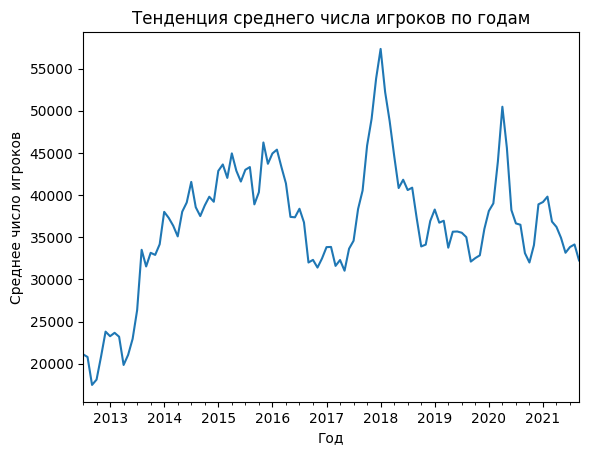

In [152]:
trend_df = df_more_playrs.groupby('Month_Year')['Avg_players'].mean()

trend_df.plot(kind='line')
plt.title('Тенденция среднего числа игроков по годам')
plt.xlabel('Год')
plt.ylabel('Среднее число игроков')
plt.show()

In [154]:
numer_game_yera = df_more_playrs.groupby('Year').size().reset_index(name='months_count')

In [155]:
numer_game_yera

,Year,months_count
0,2012,63
1,2013,189
2,2014,266
3,2015,370
4,2016,510
5,2017,653
6,2018,712
7,2019,766
8,2020,916
9,2021,826


In [162]:
numer_game_yera = df_more_playrs.groupby('Year')[['Year', 'Game_Name']]
numer_game_yera

In [153]:
df_more_playrs

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,release_date,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Month,Year,Month_Name
0,2021-09,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,9,2021,September
1,2021-08,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,8,2021,August
2,2021-07,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,7,2021,July
3,2021-06,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,6,2021,June
4,2021-05,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,counter strike global offensive,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,5,2021,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,2016-12,192.03,-21.90,-10.24%,405,https://steamcharts.com/app/435150,2016-12-01,divinity original sin 2,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,12,2016,December
5267,2016-11,213.92,-134.68,-38.63%,537,https://steamcharts.com/app/435150,2016-11-01,divinity original sin 2,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,11,2016,November
5268,2016-10,348.60,-201.75,-36.66%,1031,https://steamcharts.com/app/435150,2016-10-01,divinity original sin 2,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,10,2016,October
5269,2016-09,550.36,543.26,+7654.89%,2836,https://steamcharts.com/app/435150,2016-09-01,divinity original sin 2,0.0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,9,2016,September


Количество уникальных игр по месяцам/годам:
    Month_Year  Unique_Games_Count
0      2012-07                   9
1      2012-08                  10
2      2012-09                  11
3      2012-10                  11
4      2012-11                  11
..         ...                 ...
106    2021-05                  91
107    2021-06                  91
108    2021-07                  91
109    2021-08                  94
110    2021-09                  98

[111 rows x 2 columns]


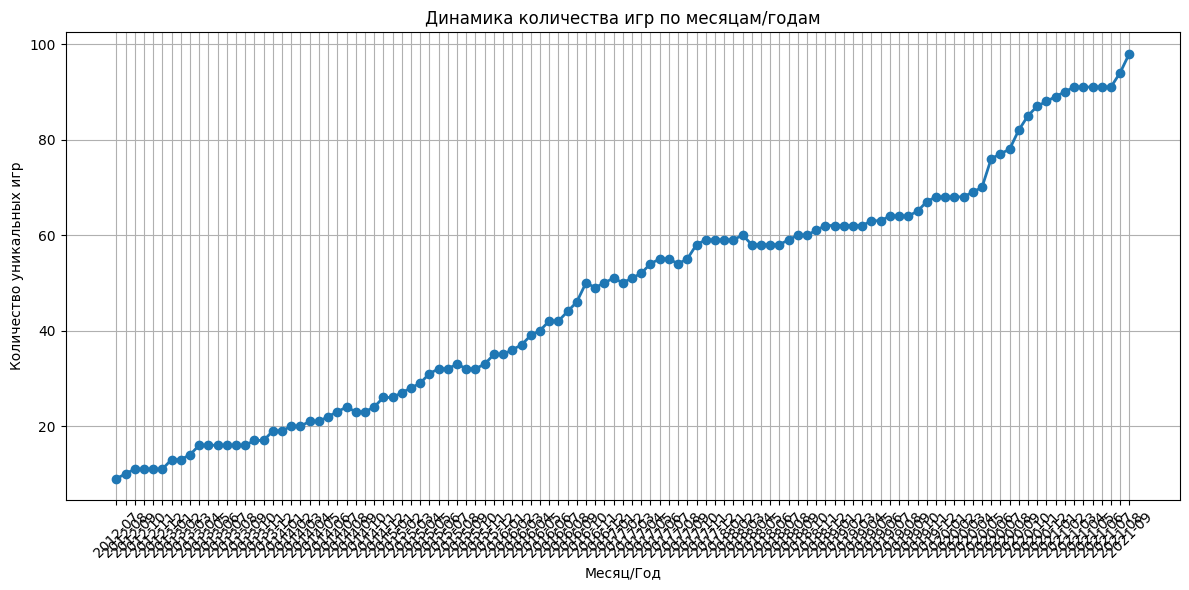

In [169]:
# Правильный способ подсчета количества уникальных игр по годам
numer_game_year = df_more_players.groupby('Month_Year')['Game_Name'].nunique().reset_index()
numer_game_year.columns = ['Month_Year', 'Unique_Games_Count']

collect_games_yers = df_more_players.groupby('Month_Year')['Avg_players'].mean().reset_index()
collect_games_yers.columns = ['Month_Year', 'Avg_Players_Count']

# Исправляем merge - добавляем параметр 'on'
merge_collect_game = collect_games_yers.merge(numer_game_year, on='Month_Year', how='inner')

# Преобразуем Period в строку для отображения
merge_collect_game['Month_Year_Str'] = merge_collect_game['Month_Year'].astype(str)

print("Количество уникальных игр по месяцам/годам:")
print(numer_game_year)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(merge_collect_game['Month_Year_Str'], merge_collect_game['Unique_Games_Count'], marker='o', linewidth=2)
plt.xlabel('Месяц/Год')
plt.ylabel('Количество уникальных игр')
plt.title('Динамика количества игр по месяцам/годам')
plt.xticks(rotation=45)  # Поворачиваем подписи для читаемости
plt.grid(True)
plt.tight_layout()  # Улучшаем расположение элементов
plt.show()

In [174]:
!pip install scipy

In [187]:
!pip install seaborn

In [188]:
import seaborn

ModuleNotFoundError: No module named 'seaborn'